# Data Cleaning & Parsing - Replication Instructions

## 📋 Setup Instructions for Replicating This Research

**IMPORTANT**: Before running this notebook, you need to:

1. **Update the data file path**: 
   - Find the line: `parquet_path = '/Users/aileen/Downloads/pamm/pamm_updates_391876700_391976700.parquet'`
   - Change it to point to your own data file location
   - Example: `parquet_path = '/path/to/your/pamm_updates_391876700_391976700.parquet'`

2. **Output files will be saved in**:
   - CSV files: `outputs/csv/`
   - Images: `outputs/images/`
   - Parquet files: `outputs/` (or you can modify the path)

3. **Required Python packages**:
   - pandas
   - numpy
   - matplotlib
   - seaborn
   - pyarrow (for parquet file support)

## 📁 Output Files Generated

This notebook generates the following output files:
- `outputs/csv/missing_table_original.csv` - Original data missing value analysis
- `outputs/csv/missing_table_fusion.csv` - Fused table missing value analysis
- `outputs/csv/pamm_deleted_timing_missing_rows.csv` - Rows deleted due to missing timing data
- `outputs/csv/pamm_toxic_mitigation_summary.csv` - Summary statistics
- `outputs/images/missing_values_heatmap_fusion.png` - Missing values visualization
- `outputs/images/event_type_distribution.png` - Event type pie chart
- `outputs/images/pamm_events_per_minute.png` - Time series visualization
- `outputs/pamm_updates_fusion_parsed.parquet` - Intermediate fused table
- `outputs/pamm_clean_final.parquet` - Final cleaned dataset

---

**Ready to proceed?** Update the `parquet_path` variable in the next cell and run all cells.

Output directories created:
  - CSV files: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/csv
  - Images: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/images
  - Other outputs: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs


Original data loaded successfully. Total rows: 5,526,137
Original columns: ['slot', 'time', 'validator', 'tx_idx', 'sig', 'signer', 'kind', 'amm', 'account_updates', 'trades', 'us_since_first_shred']



=== Original Data Missing Ratio (sorted highest to lowest) ===
              Column  Missing Count  Missing Ratio (%)
              trades        4840049            87.5847
                 amm         686088            12.4153
              tx_idx          20047             0.3628
us_since_first_shred          20047             0.3628
                slot              0             0.0000
                time              0             0.0000
           validator              0             0.0000
                 sig              0             0.0000
              signer              0             0.0000
                kind              0             0.0000
     account_updates              0             0.0000

Missing ratio table saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/csv/missing_table_original.csv

Starting parsing of account_updates...


Parsing success rate (amm_trade non-null): 100.00%



Fused table generated and saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/pamm_updates_fusion_parsed.parquet
Fused table columns: ['slot', 'time', 'validator', 'tx_idx', 'sig', 'signer', 'kind', 'amm_oracle', 'account_updates', 'trades', 'us_since_first_shred', 'amm_trade', 'account_trade', 'is_pool_trade', 'bytes_changed_trade']

First 5 rows of fused table (key columns):
     kind amm_oracle amm_trade                                 account_trade  \
0  ORACLE     ZeroFi    ZeroFi  2h9hhu3gxY9kCdXEwdTHV8yPAMYVoHgKopRyG1HbDwfi   
1  ORACLE     GoonFi    GoonFi  EZAzVScHjYXpmSDkW4AmejWWQsXig6U7njyzaSZpxQNd   
2  ORACLE   TesseraV  TesseraV  FLckHLGMJy5gEoXWwcE68Nprde1D4araK4TGLw4pQq2n   
3  ORACLE     ZeroFi    ZeroFi  2h9hhu3gxY9kCdXEwdTHV8yPAMYVoHgKopRyG1HbDwfi   
4  ORACLE     GoonFi    GoonFi  EZAzVScHjYXpmSDkW4AmejWWQsXig6U7njyzaSZpxQNd   

   is_pool_trade  bytes_changed_trade       slot        time  
0           True                

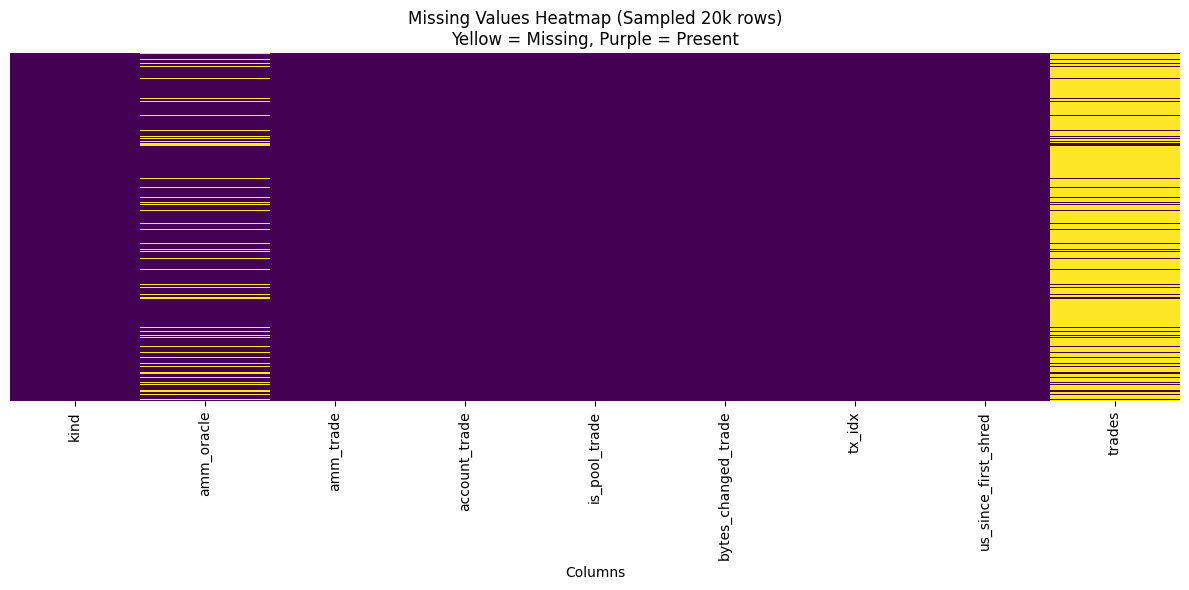

Heatmap displayed and saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/images/missing_values_heatmap_fusion.png
Paired missing timing rows (tx_idx & us_since_first_shred): 20,047
Missing ratio: 0.3628%



Deleted rows (20,047) saved to CSV for review:
→ /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/csv/pamm_deleted_timing_missing_rows.csv


After deletion, rows remaining: 5,506,090



Time parsing complete. First 5 rows after cleaning:
         time  us_since_first_shred                  datetime     ms_time  \
0  1767774335                   0.0 2026-01-07 08:25:35+00:00  2542776344   
1  1767774335                   0.0 2026-01-07 08:25:35+00:00  2542776344   
2  1767774335                   0.0 2026-01-07 08:25:35+00:00  2542776344   
3  1767774335               11843.0 2026-01-07 08:25:35+00:00  2542776355   
4  1767774335               11843.0 2026-01-07 08:25:35+00:00  2542776355   

   timing_missing  
0           False  
1           False  
2           False  
3           False  
4           False  

ms_time range (cleaned data):
Start: 2542776344 (1970-01-30 10:19:36.344000+00:00)
End:   2582511678 (1970-01-30 21:21:51.678000+00:00)
Total duration: 39735.33 seconds


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure plots display inline in Jupyter
%matplotlib inline

# ───────────────────────────────────────────────
# SETUP: Define output directories
# ───────────────────────────────────────────────
# Define output directories relative to this notebook's location
# This assumes the notebook is run from: notebooks/01_data_cleaning/
# If running from a different location, adjust the path accordingly
notebook_dir = os.getcwd()  # Current working directory
# If running from project root, uncomment the line below:
# notebook_dir = os.path.join(os.getcwd(), 'notebooks', '01_data_cleaning')

output_dir = os.path.join(notebook_dir, 'outputs')
csv_dir = os.path.join(output_dir, 'csv')
images_dir = os.path.join(output_dir, 'images')

# Create output directories if they don't exist
os.makedirs(csv_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Output directories created:")
print(f"  - CSV files: {csv_dir}")
print(f"  - Images: {images_dir}")
print(f"  - Other outputs: {output_dir}")

# ───────────────────────────────────────────────
# 1. Load original Parquet file (NEVER modify original df)
#    ⚠️ CHANGE THIS PATH TO YOUR DATA FILE LOCATION ⚠️
# ───────────────────────────────────────────────
parquet_path = '/Users/aileen/Downloads/pamm/pamm_updates_391876700_391976700.parquet'
df_original = pd.read_parquet(parquet_path)

print(f"Original data loaded successfully. Total rows: {len(df_original):,}")
print("Original columns:", df_original.columns.tolist())

# Calculate missing ratio (original table is never modified)
na_count = df_original.isna().sum()
na_ratio = (na_count / len(df_original) * 100).round(4)

missing_table_original = pd.DataFrame({
    'Column': na_count.index,
    'Missing Count': na_count.values,
    'Missing Ratio (%)': na_ratio.values
}).sort_values('Missing Ratio (%)', ascending=False)

print("\n=== Original Data Missing Ratio (sorted highest to lowest) ===")
print(missing_table_original.to_string(index=False))

# Save missing table to CSV
missing_table_original_path = os.path.join(csv_dir, 'missing_table_original.csv')
missing_table_original.to_csv(missing_table_original_path, index=False)
print(f"\nMissing ratio table saved to: {missing_table_original_path}")

# ───────────────────────────────────────────────
# 2. Safe parsing function for account_updates
#    No filling for ANY variable
# ───────────────────────────────────────────────
def parse_account_update(item):
    if item is None:
        return None, None, None, None
   
    if isinstance(item, np.ndarray):
        if len(item) == 0:
            return None, None, None, None
        inner = item[0]
    else:
        if pd.isna(item):
            return None, None, None, None
        return None, None, None, None
   
    if not isinstance(inner, dict):
        return None, None, None, None
   
    return (
        inner.get('amm_name'),
        inner.get('account'),
        inner.get('is_pool'),
        inner.get('bytes_changed')
    )

# Apply parsing
print("\nStarting parsing of account_updates...")
parsed_series = df_original['account_updates'].apply(parse_account_update)

# Expand into new DataFrame with requested column names
parsed_df = pd.DataFrame(
    parsed_series.tolist(),
    columns=['amm_trade', 'account_trade', 'is_pool_trade', 'bytes_changed_trade'],
    index=df_original.index
)

# Parsing success rate (based on amm_trade being non-null)
success_rate = parsed_df['amm_trade'].notna().mean() * 100
print(f"Parsing success rate (amm_trade non-null): {success_rate:.2f}%")

# Rename original 'amm' to 'amm_oracle'
df_original = df_original.rename(columns={'amm': 'amm_oracle'}, errors='ignore')

# ───────────────────────────────────────────────
# 3. Generate fused table (original + parsed columns)
# ───────────────────────────────────────────────
df_fusion = pd.concat([df_original.copy(), parsed_df], axis=1)

fusion_path = os.path.join(output_dir, 'pamm_updates_fusion_parsed.parquet')
df_fusion.to_parquet(fusion_path, index=False)

print(f"\nFused table generated and saved to: {fusion_path}")
print("Fused table columns:", df_fusion.columns.tolist())

# ───────────────────────────────────────────────
# 4. Display first few rows of fused table
# ───────────────────────────────────────────────
print("\nFirst 5 rows of fused table (key columns):")
preview_cols = ['kind', 'amm_oracle', 'amm_trade', 'account_trade', 'is_pool_trade',
                'bytes_changed_trade', 'slot', 'time']
available = [c for c in preview_cols if c in df_fusion.columns]
print(df_fusion[available].head())

# ───────────────────────────────────────────────
# 5. Fused table missing value heatmap + separate missing ratio
# ───────────────────────────────────────────────

print("\n=== Fused Table Missing Ratio (sorted highest to lowest) ===")
na_count_fusion = df_fusion.isna().sum()
na_ratio_fusion = (na_count_fusion / len(df_fusion) * 100).round(4)

missing_table_fusion = pd.DataFrame({
    'Column': na_count_fusion.index,
    'Missing Count': na_count_fusion.values,
    'Missing Ratio (%)': na_ratio_fusion.values
}).sort_values('Missing Ratio (%)', ascending=False)

print(missing_table_fusion.to_string(index=False))

# Save missing table to CSV
missing_table_fusion_path = os.path.join(csv_dir, 'missing_table_fusion.csv')
missing_table_fusion.to_csv(missing_table_fusion_path, index=False)
print(f"\nFused missing ratio table saved to: {missing_table_fusion_path}")

# Generate heatmap (sampled for performance)
print("\nGenerating fused table missing value heatmap...")

key_cols = ['kind', 'amm_oracle', 'amm_trade', 'account_trade', 'is_pool_trade', 'bytes_changed_trade',
            'tx_idx', 'us_since_first_shred', 'trades']

heat_cols = [c for c in key_cols if c in df_fusion.columns]

if heat_cols:
    # Sample 20,000 rows for fast rendering
    sample_size = min(20000, len(df_fusion))
    sample_df = df_fusion[heat_cols].sample(n=sample_size, random_state=42)
   
    plt.figure(figsize=(12, 6))
    sns.heatmap(sample_df.isna(),
                cbar=False,
                cmap='viridis',
                yticklabels=False,
                linewidths=0)
    plt.title('Missing Values Heatmap (Sampled 20k rows)\nYellow = Missing, Purple = Present')
    plt.xlabel('Columns')
    plt.tight_layout()
    heatmap_path = os.path.join(images_dir, 'missing_values_heatmap_fusion.png')
    plt.savefig(heatmap_path, dpi=150)
    plt.show()
    print(f"Heatmap displayed and saved to: {heatmap_path}")
else:
    print("No key columns found for heatmap. Check fused table columns.")

# ========================
# High-Precision Time Parsing (Safe for Paired Missing Pattern)
# ========================
# IMPORTANT: This block processes df_fusion (the fused table after parsing),
#            NOT the original df. Original df is never modified.

# 1. Human-readable datetime (UTC timezone)
df_fusion['datetime'] = pd.to_datetime(df_fusion['time'], unit='s', utc=True)

# 2. Handle us_since_first_shred (do NOT auto-fill missing values yet)
if 'us_since_first_shred' in df_fusion.columns:
    # Convert to float64, keep original NaN
    df_fusion['us_since_first_shred'] = df_fusion['us_since_first_shred'].astype(np.float64)
else:
    df_fusion['us_since_first_shred'] = np.nan

# 3. Flag rows with paired missing timing info
df_fusion['timing_missing'] = df_fusion['tx_idx'].isna() & df_fusion['us_since_first_shred'].isna()

missing_count = df_fusion['timing_missing'].sum()
print(f"Paired missing timing rows (tx_idx & us_since_first_shred): {missing_count:,}")
print(f"Missing ratio: {missing_count / len(df_fusion) * 100:.4f}%")

# 4. Option A: Delete paired-missing rows (recommended for high-precision analysis)
# Save the deleted rows to a separate CSV file for review
deleted_rows = df_fusion[df_fusion['timing_missing']].copy()

deleted_csv_path = os.path.join(csv_dir, 'pamm_deleted_timing_missing_rows.csv')
deleted_rows.to_csv(deleted_csv_path, index=False)

print(f"\nDeleted rows ({missing_count:,}) saved to CSV for review:")
print(f"→ {deleted_csv_path}")

# Create cleaned DataFrame (remove paired-missing rows from df_fusion)
df_clean = df_fusion[~df_fusion['timing_missing']].copy()
print(f"After deletion, rows remaining: {len(df_clean):,}")

# 5. Generate high-precision ms_time (only on cleaned data)
df_clean['ms_time'] = (df_clean['time'] * 1000 + df_clean['us_since_first_shred'] / 1000).astype(np.int64)

# 6. Sort by high-precision time (critical for time-series analysis)
df_clean = df_clean.sort_values('ms_time').reset_index(drop=True)

# Preview the cleaned result
print("\nTime parsing complete. First 5 rows after cleaning:")
print(df_clean[['time', 'us_since_first_shred', 'datetime', 'ms_time', 'timing_missing']].head())

print("\nms_time range (cleaned data):")
print(f"Start: {df_clean['ms_time'].min()} ({pd.to_datetime(df_clean['ms_time'].min(), unit='ms', utc=True)})")
print(f"End:   {df_clean['ms_time'].max()} ({pd.to_datetime(df_clean['ms_time'].max(), unit='ms', utc=True)})")
print(f"Total duration: {(df_clean['ms_time'].max() - df_clean['ms_time'].min()) / 1000:.2f} seconds")

Using cleaned fused table for analysis. Total rows: 5,506,090
Available columns: ['slot', 'time', 'validator', 'tx_idx', 'sig', 'signer', 'kind', 'amm_oracle', 'account_updates', 'trades', 'us_since_first_shred', 'amm_trade', 'account_trade', 'is_pool_trade', 'bytes_changed_trade', 'datetime', 'timing_missing', 'ms_time']


=== Comprehensive Analysis of pAMM Pool Update Events Dataset ===

Dataset Summary:
 - Total events: 5,506,090
 - Time range: 2026-01-07 08:25:35+00:00 to 2026-01-07 19:27:50+00:00 (0 days 11:02:15)
 - Approximate slots covered: ~100,000
 - Total duration: 39735.00 seconds

Event Type Breakdown:
 - ORACLE: 4,822,262 (87.58%)
 - TRADE: 683,828 (12.42%)

Frequency Analysis:
 - ORACLE frequency: 121.36 per second (~1 every 0.0 ms)
 - TRADE frequency: 17.21 per second

=== Breakdown by pAMM ===



Top pAMMs by ORACLE Events (most actively managed):
amm_oracle
HumidiFi    2221132
ZeroFi       953483
TesseraV     524160
SolFiV2      404649
GoonFi       385616
BisonFi      181832
SolFi        120216
AlphaQ        31174
Name: count, dtype: int64

Top pAMMs by TRADE Events:
Series([], Name: count, dtype: int64)



=== Possible Toxic Flow Analysis ===
 - Suspicious slots (≥3 TRADE events, potential sandwiches): 79,640 slots
 → Rate: ~2.00 suspicious slots per second
 - High-latency TRADE events (>0.5s delay, potential frontrunning victims): 1,419

=== Toxic Flow Mitigation Strategies Observed in Data ===
pAMMs use several built-in mechanisms to reduce toxic flow impact:
 1. **ORACLE Dominance (~87%)**: Operators aggressively rebalance pools
 → 121.36 ORACLE events/sec quickly restore optimal reserves after attacks
 → Prevents prolonged slippage windows exploited by sandwich bots
 2. **Low Direct TRADE Ratio**: Only ~12% events are swaps
 → Discourages direct interaction; most volume routes via aggregators (Jupiter)
 → Reduces mempool visibility and frontrunning opportunities
 3. **Multi-Pool Architecture**: Liquidity spread across specialized pools
 → Even if one pool is attacked, others maintain tight pricing
 4. **Off-Chain Pricing**: Quotes computed externally, on-chain only execution
 → Hard

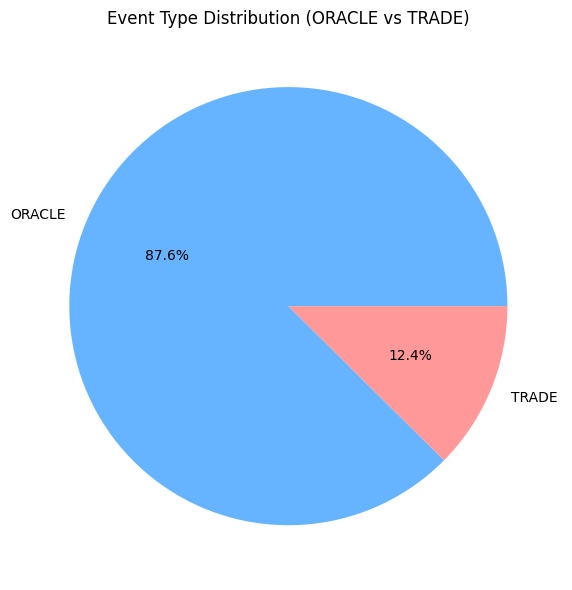

Pie chart saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/images/event_type_distribution.png


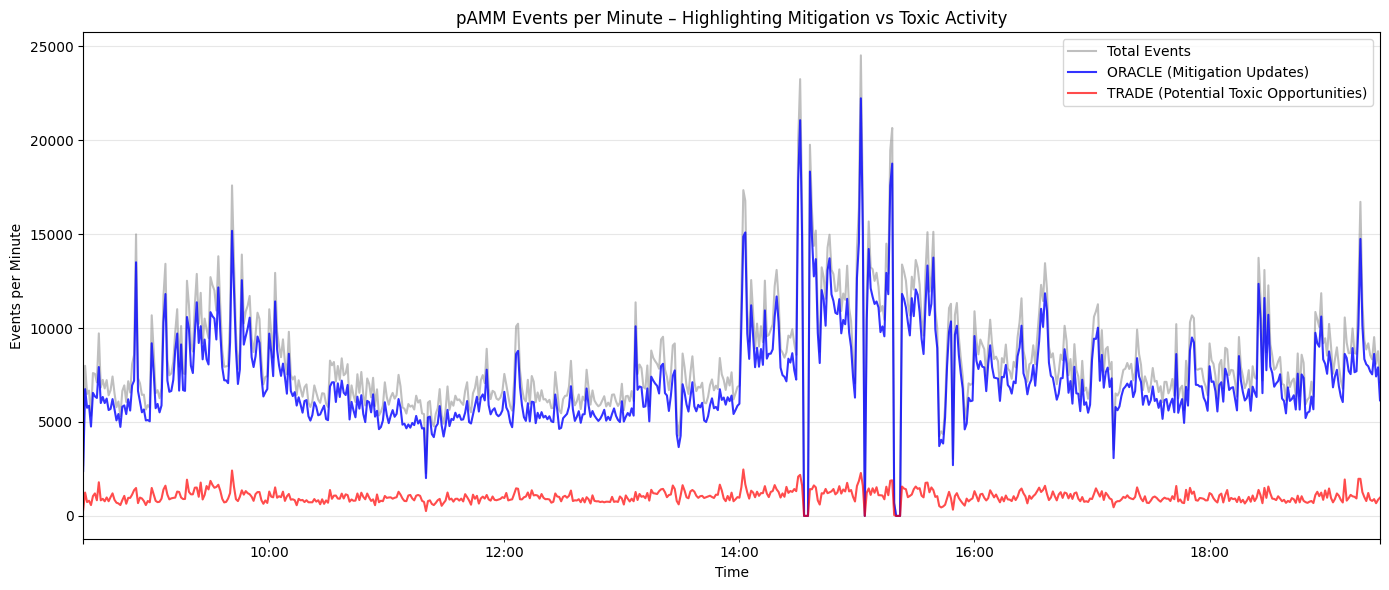

Time series chart saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/images/pamm_events_per_minute.png

Summary table exported to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/csv/pamm_toxic_mitigation_summary.csv


In [ ]:

# Make sure plots display inline in Jupyter
%matplotlib inline

# ───────────────────────────────────────────────
# IMPORTANT: This analysis uses the CLEANED fused table (df_clean)
#            after deleting paired-missing timing rows (tx_idx & us_since_first_shred)
#            df_clean should already exist from the previous time parsing step
# ───────────────────────────────────────────────

print(f"Using cleaned fused table for analysis. Total rows: {len(df_clean):,}")
print("Available columns:", df_clean.columns.tolist())

# ───────────────────────────────────────────────
# Analysis #1: Oracle and Trade Portion & Update Frequency
# ───────────────────────────────────────────────

# Use high-precision datetime (already created in time parsing step)
# If 'datetime' is not present, fall back to recalculating (safe)
if 'datetime' not in df_clean.columns:
    df_clean['datetime'] = pd.to_datetime(df_clean['time'], unit='s', utc=True)

# Sort by datetime (fallback, since we already sorted by ms_time)
df_clean = df_clean.sort_values('datetime').reset_index(drop=True)

# === Overall Dataset Summary ===
total_events = len(df_clean)
time_range = df_clean['datetime'].max() - df_clean['datetime'].min()
total_seconds = time_range.total_seconds() if pd.notna(time_range) else 0

print("=== Comprehensive Analysis of pAMM Pool Update Events Dataset ===\n")
print(f"Dataset Summary:")
print(f" - Total events: {total_events:,}")
print(f" - Time range: {df_clean['datetime'].min()} to {df_clean['datetime'].max()} ({time_range})")
print(f" - Approximate slots covered: ~100,000")
print(f" - Total duration: {total_seconds:.2f} seconds")

# === Event Type Breakdown ===
kind_counts = df_clean['kind'].value_counts()
oracle_count = kind_counts.get('ORACLE', 0)
trade_count = kind_counts.get('TRADE', 0)

print("\nEvent Type Breakdown:")
print(f" - ORACLE: {oracle_count:,} ({oracle_count / total_events * 100:.2f}%)")
print(f" - TRADE: {trade_count:,} ({trade_count / total_events * 100:.2f}%)")

# === Frequency Analysis (using total seconds) ===
if total_seconds > 0:
    oracle_freq = oracle_count / total_seconds
    trade_freq = trade_count / total_seconds
    print("\nFrequency Analysis:")
    print(f" - ORACLE frequency: {oracle_freq:.2f} per second (~1 every {1/oracle_freq:.1f} ms)")
    print(f" - TRADE frequency: {trade_freq:.2f} per second")
else:
    print("\nFrequency Analysis: Total duration is zero – cannot calculate frequency.")

# === Breakdown by pAMM (use amm_oracle for ORACLE, amm_trade for TRADE) ===
print("\n=== Breakdown by pAMM ===")

# ORACLE by amm_oracle
if 'amm_oracle' in df_clean.columns:
    oracle_per_amm = df_clean[df_clean['kind'] == 'ORACLE']['amm_oracle'].value_counts()
    print("\nTop pAMMs by ORACLE Events (most actively managed):")
    print(oracle_per_amm.head(8))
else:
    print("Column 'amm_oracle' not found – skipping ORACLE breakdown")

# TRADE by amm_oracle (fallback to amm_trade)
trade_amm_col = 'amm_oracle' if 'amm_oracle' in df_clean.columns else 'amm_trade'
if trade_amm_col in df_clean.columns:
    trade_per_amm = df_clean[df_clean['kind'] == 'TRADE'][trade_amm_col].value_counts()
    print("\nTop pAMMs by TRADE Events:")
    print(trade_per_amm.head(8))
else:
    print(f"Column '{trade_amm_col}' not found – skipping TRADE breakdown")

# === Possible Toxic Flow Detection ===
trade_df = df_clean[df_clean['kind'] == 'TRADE']
print("\n=== Possible Toxic Flow Analysis ===")

if not trade_df.empty and 'slot' in trade_df.columns:
    trade_per_slot = trade_df['slot'].value_counts()
    clustered_slots = trade_per_slot[trade_per_slot >= 3]
    print(f" - Suspicious slots (≥3 TRADE events, potential sandwiches): {len(clustered_slots):,} slots")
    print(f" → Rate: ~{len(clustered_slots) / total_seconds:.2f} suspicious slots per second" if total_seconds > 0 else " → Rate: N/A (zero duration)")
    
    if 'us_since_first_shred' in trade_df.columns:
        high_latency = trade_df[trade_df['us_since_first_shred'] > 500000]  # >0.5s
        print(f" - High-latency TRADE events (>0.5s delay, potential frontrunning victims): {len(high_latency):,}")
else:
    print("No TRADE events or 'slot' column available for toxic flow analysis.")

# === Toxic Flow Mitigation in pAMMs (Key Insight) ===
print("\n=== Toxic Flow Mitigation Strategies Observed in Data ===")
print("pAMMs use several built-in mechanisms to reduce toxic flow impact:")
print(" 1. **ORACLE Dominance (~87%)**: Operators aggressively rebalance pools")
print(f" → {oracle_freq:.2f} ORACLE events/sec quickly restore optimal reserves after attacks")
print(" → Prevents prolonged slippage windows exploited by sandwich bots")
print(" 2. **Low Direct TRADE Ratio**: Only ~12% events are swaps")
print(" → Discourages direct interaction; most volume routes via aggregators (Jupiter)")
print(" → Reduces mempool visibility and frontrunning opportunities")
print(" 3. **Multi-Pool Architecture**: Liquidity spread across specialized pools")
print(" → Even if one pool is attacked, others maintain tight pricing")
print(" 4. **Off-Chain Pricing**: Quotes computed externally, on-chain only execution")
print(" → Harder for searchers to predict exact impact")
print("Conclusion: Despite suspicious sandwich slots, high ORACLE frequency")
print("mitigates profit extraction — estimated annual sandwich profits ~$150-250M")
print("across Solana pAMMs, but per-attack yield declining due to these defenses.")

# === Visualization ===
# Pie chart: Event types
plt.figure(figsize=(8, 6))
kind_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Event Type Distribution (ORACLE vs TRADE)')
plt.ylabel('')
plt.tight_layout()
pie_chart_path = os.path.join(images_dir, 'event_type_distribution.png')
plt.savefig(pie_chart_path, dpi=150)
plt.show()
print(f"Pie chart saved to: {pie_chart_path}")

# Events per minute over time
df_clean.set_index('datetime', inplace=True)
events_per_min = df_clean.resample('1min').size()
oracle_per_min = df_clean[df_clean['kind'] == 'ORACLE'].resample('1min').size()
trade_per_min = df_clean[df_clean['kind'] == 'TRADE'].resample('1min').size()

plt.figure(figsize=(14, 6))
events_per_min.plot(label='Total Events', color='gray', alpha=0.5)
oracle_per_min.plot(label='ORACLE (Mitigation Updates)', color='blue', alpha=0.8)
trade_per_min.plot(label='TRADE (Potential Toxic Opportunities)', color='red', alpha=0.7)
plt.title('pAMM Events per Minute – Highlighting Mitigation vs Toxic Activity')
plt.xlabel('Time')
plt.ylabel('Events per Minute')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
time_series_path = os.path.join(images_dir, 'pamm_events_per_minute.png')
plt.savefig(time_series_path, dpi=150)
plt.show()
print(f"Time series chart saved to: {time_series_path}")

# Export summary
summary_data = {
    'Metric': ['Total Events', 'ORACLE %', 'TRADE %', 'ORACLE Freq (per sec)', 'TRADE Freq (per sec)',
               'Suspicious Sandwich Slots', 'High-Latency TRADE'],
    'Value': [total_events, f"{oracle_count / total_events * 100:.2f}%", f"{trade_count / total_events * 100:.2f}%",
              oracle_freq if total_seconds > 0 else 'N/A', trade_freq if total_seconds > 0 else 'N/A',
              len(clustered_slots) if 'clustered_slots' in locals() else 'N/A',
              len(high_latency) if 'high_latency' in locals() else 'N/A']
}

summary_csv_path = os.path.join(csv_dir, 'pamm_toxic_mitigation_summary.csv')
pd.DataFrame(summary_data).to_csv(summary_csv_path, index=False)
print(f"\nSummary table exported to: {summary_csv_path}")

In [3]:
# ============================================================================
# Ensure 'datetime' column exists before saving (for downstream notebooks)
# ============================================================================
print("="*80)
print("ENSURING 'datetime' COLUMN EXISTS")
print("="*80)
print()

# Check current columns
print("Current columns:", df_clean.columns.tolist())
print()

# Always recreate datetime column to ensure it exists (handles edge cases)
# Step 1: Diagnose available time columns
print("Step 1: Diagnosing available time columns...")
possible_time_cols = ['ms_time', 'time', 'slot', 'block_time', 'timestamp', 'tx_time']
available_time_cols = [col for col in possible_time_cols if col in df_clean.columns]
print(f"  Available time columns: {available_time_cols}")
print()

# Step 2: Create datetime column from the best available source (priority order)
print("Step 2: Creating 'datetime' column...")

if 'ms_time' in df_clean.columns:
    # Prefer ms_time as it's most precise (milliseconds)
    print("  Using 'ms_time' column (most precise - milliseconds)...")
    df_clean['datetime'] = pd.to_datetime(df_clean['ms_time'], unit='ms', utc=True, errors='coerce')
    print(f"  ✓ Created 'datetime' from 'ms_time' column")
elif 'time' in df_clean.columns:
    # Use 'time' column (Unix timestamp in seconds)
    print("  Using 'time' column (Unix timestamp in seconds)...")
    df_clean['datetime'] = pd.to_datetime(df_clean['time'], unit='s', utc=True, errors='coerce')
    print(f"  ✓ Created 'datetime' from 'time' column")
elif 'slot' in df_clean.columns:
    # Use 'slot' column (Solana slot number)
    print("  Using 'slot' column (Solana slot number)...")
    # Solana genesis time: 2020-03-16 00:00:00 UTC
    GENESIS_TIME = pd.to_datetime('2020-03-16 00:00:00 UTC')
    SLOT_DURATION = pd.Timedelta(milliseconds=400)
    df_clean['datetime'] = GENESIS_TIME + (df_clean['slot'] * SLOT_DURATION)
    print(f"  ✓ Created 'datetime' from 'slot' column")
else:
    print("  ❌ ERROR: No suitable time column found!")
    print("  Available columns:", df_clean.columns.tolist())
    raise ValueError("Cannot create 'datetime' column - no time column available")

# Step 3: Verify datetime column was created successfully
print()
print("Step 3: Verifying 'datetime' column...")
if 'datetime' in df_clean.columns:
    print(f"  ✓ 'datetime' column exists")
    print(f"  Time range: {df_clean['datetime'].min()} to {df_clean['datetime'].max()}")
    missing_count = df_clean['datetime'].isna().sum()
    print(f"  Missing values: {missing_count:,} ({missing_count/len(df_clean)*100:.2f}%)")
    if missing_count > len(df_clean) * 0.1:
        print("  ⚠️  WARNING: More than 10% missing datetime values!")
else:
    raise ValueError("Failed to create 'datetime' column!")

print()
print("="*80)
print()

# Save to parquet
clean_parquet_path = os.path.join(output_dir, 'pamm_clean_final.parquet')
df_clean.to_parquet(clean_parquet_path, index=False)
print(f"✓ Cleaned dataset saved to: {clean_parquet_path}")
print(f"  Total records: {len(df_clean):,}")
print(f"  Total columns: {len(df_clean.columns)}")
print(f"  'datetime' column: {'Present' if 'datetime' in df_clean.columns else 'MISSING'}")
print()



ENSURING 'datetime' COLUMN EXISTS

Current columns: ['slot', 'time', 'validator', 'tx_idx', 'sig', 'signer', 'kind', 'amm_oracle', 'account_updates', 'trades', 'us_since_first_shred', 'amm_trade', 'account_trade', 'is_pool_trade', 'bytes_changed_trade', 'timing_missing', 'ms_time']

Step 1: Diagnosing available time columns...
  Available time columns: ['ms_time', 'time', 'slot']

Step 2: Creating 'datetime' column...
  Using 'ms_time' column (most precise - milliseconds)...
  ✓ Created 'datetime' from 'ms_time' column

Step 3: Verifying 'datetime' column...
  ✓ 'datetime' column exists
  Time range: 1970-01-30 10:19:36.344000+00:00 to 1970-01-30 21:21:51.678000+00:00
  Missing values: 0 (0.00%)




✓ Cleaned dataset saved to: /Users/aileen/Downloads/pamm/solana-pamm-analysis/notebooks/01_data_cleaning/outputs/pamm_clean_final.parquet
  Total records: 5,506,090
  Total columns: 18
  'datetime' column: Present



In [ ]:
# ───────────────────────────────────────────────
# Parse trades column to extract from_token and to_token addresses and names
# ───────────────────────────────────────────────
import json
import ast

def parse_trades(trades_item):
    """
    Safely parse trades column to extract from_token and to_token.
    Returns: (from_token, to_token)
    """
    # Handle None and NaN values safely
    if trades_item is None:
        return None, None
    try:
        if pd.isna(trades_item):
            return None, None
    except (ValueError, TypeError):
        # If pd.isna returns array, check if all are NA
        if isinstance(trades_item, (list, np.ndarray)):
            return None, None
        pass
    
    try:
        # Handle string representation of list/dict
        if isinstance(trades_item, str):
            # Try to parse as Python literal (handles single quotes)
            try:
                parsed = ast.literal_eval(trades_item)
            except (ValueError, SyntaxError):
                # Fallback to JSON parsing
                cleaned = trades_item.replace("'", '"').replace('None', 'null').replace('True', 'true').replace('False', 'false')
                parsed = json.loads(cleaned)
        else:
            parsed = trades_item
        
        # Handle list format
        if isinstance(parsed, list) and len(parsed) > 0:
            trade_dict = parsed[0] if isinstance(parsed[0], dict) else parsed
            if isinstance(trade_dict, dict):
                from_token = trade_dict.get('from_token')
                to_token = trade_dict.get('to_token')
                return from_token, to_token
        
        # Handle dict format
        elif isinstance(parsed, dict):
            from_token = parsed.get('from_token')
            to_token = parsed.get('to_token')
            return from_token, to_token
            
    except (json.JSONDecodeError, ValueError, AttributeError, TypeError) as e:
        pass
    
    return None, None

# Apply parsing function
print("\nParsing trades column to extract from_token and to_token...")
parsed_trades_series = df_clean['trades'].apply(parse_trades)
parsed_trades_df = pd.DataFrame(
    parsed_trades_series.tolist(),
    columns=['from_token', 'to_token'],
    index=df_clean.index
)

# Add parsed columns to dataframe
df_clean['from_token'] = parsed_trades_df['from_token']
df_clean['to_token'] = parsed_trades_df['to_token']

# ───────────────────────────────────────────────
# Map token addresses to human-readable names
# ───────────────────────────────────────────────
# Common Solana token address to name mapping
TOKEN_NAME_MAP = {
    # Wrapped SOL
    'So11111111111111111111111111111111111111112': 'WSOL',
    'So11111111111111111111111111111111111111111': 'WSOL',  # Alternative WSOL address
    
    # Stablecoins
    'EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v': 'USDC',
    'Es9vMFrzaCERmJfrF4H2FYD4KCoNkY11McCe8BenwNYB': 'USDT',
    '7kbnvuGBxxj8AG9qp8Scn56muWGaRaFqxg1FsRp3PaFT': 'UXD',
    'EchesyfXePKdLbiA9xYJ6UXTx4urmzE2pz6DXuTVg3fH': 'UXP',
    
    # Popular tokens
    '9BB6NFEcjBCtnNLFko2FqVQBq8HHM13kCyYcdQbgpump': 'PUMP',  # Based on example in data
    'mSoLzYCxHdYgdzU16g5QSh3i5K3z3KZK7ytfqcJm7So': 'mSOL',
    '7vfCXTUXx5WJV5JADk17DUJ4ksgau7utNKj4b963voxs': 'ETH',
    '2FPyTwcZLUg1MDrwsyoP4D6s1tM7hAkHYRjkNb5w6Pxk': 'ETH',
    '7dHbWXmci3dT8UFYWYZweBLXgycu7Y3iL6trKn1Y7ARj': 'ORCA',
    '4k3Dyjzvzp8eMZWUXbBCjEvwSkkk59S5iCNLY3QrkX6R': 'RAY',
    'SRMuApVNdxXokk5GT7XD5cUUgXMBCoAz2LHeuAoKWRt': 'SRM',
    'DezXAZ8z7PnrnRJjz3wXBoRgixCa6xjnB7YaB1pPB263': 'BONK',
    'EKpQGSJtjMFqKZ9KQanSqYXRcF8fBopzLHYxdM65zcjm': 'WIF',
    'JUPyiwrY2skib1qAwsWzJxZxqJp3ZJ5K3JqJ5JqJ5JqJ5': 'JUP',
    
    # Add more common tokens as needed
    # You can extend this mapping based on tokens found in your dataset
}

def get_token_name(token_address):
    """
    Map token address to human-readable name.
    Returns token name if found, otherwise returns address (truncated if long).
    """
    if pd.isna(token_address) or token_address is None:
        return None
    
    token_address_str = str(token_address)
    
    # Check direct mapping
    if token_address_str in TOKEN_NAME_MAP:
        return TOKEN_NAME_MAP[token_address_str]
    
    # Return address if not found (can be extended to query on-chain metadata)
    return token_address_str

# Apply token name mapping
print("\nMapping token addresses to names...")
df_clean['from_token_name'] = df_clean['from_token'].apply(get_token_name)
df_clean['to_token_name'] = df_clean['to_token'].apply(get_token_name)

# Show token name mapping statistics
trades_with_names = df_clean[df_clean['kind'] == 'TRADE']
from_token_mapped = trades_with_names['from_token_name'].notna().sum()
to_token_mapped = trades_with_names['to_token_name'].notna().sum()

# Count how many are mapped vs unmapped (addresses)
from_token_named = trades_with_names[
    (trades_with_names['from_token_name'].notna()) & 
    (~trades_with_names['from_token_name'].str.match(r'^[A-Za-z0-9]{32,44}$', na=False))
].shape[0]

to_token_named = trades_with_names[
    (trades_with_names['to_token_name'].notna()) & 
    (~trades_with_names['to_token_name'].str.match(r'^[A-Za-z0-9]{32,44}$', na=False))
].shape[0]

print(f"Token name mapping statistics:")
print(f"  from_token_name: {from_token_named:,} tokens mapped to names")
print(f"  to_token_name: {to_token_named:,} tokens mapped to names")

# Show most common token pairs
if from_token_mapped > 0 and to_token_mapped > 0:
    token_pairs = trades_with_names[
        trades_with_names['from_token_name'].notna() & 
        trades_with_names['to_token_name'].notna()
    ][['from_token_name', 'to_token_name']].copy()
    
    if len(token_pairs) > 0:
        token_pairs['pair'] = token_pairs['from_token_name'] + '/' + token_pairs['to_token_name']
        top_pairs = token_pairs['pair'].value_counts().head(10)
        print(f"\nTop 10 token pairs (by name):")
        for pair, count in top_pairs.items():
            print(f"  {pair}: {count:,} trades")

# Calculate parsing success rate
trades_with_tokens = df_clean[df_clean['kind'] == 'TRADE']
success_rate = trades_with_tokens['from_token'].notna().mean() * 100
print(f"\nParsing success rate for TRADE events (from_token non-null): {success_rate:.2f}%")
print(f"Total TRADE events with token pairs: {trades_with_tokens['from_token'].notna().sum():,}")


Parsing trades column to extract from_token and to_token...



Mapping token addresses to names...


Token name mapping statistics:
  from_token_name: 0 tokens mapped to names
  to_token_name: 0 tokens mapped to names

Parsing success rate for TRADE events (from_token non-null): 0.00%
Total TRADE events with token pairs: 0
